<a href="https://colab.research.google.com/github/mukul-mschauhan/Machine-Learning-Projects/blob/master/Workathon_Price_Prediction_An_Intro_to_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Overview

The new covid-era has provided a new way of living the work-life balance. We have seen a lot of different websites providing packages to work from different locations. From Kashmir to Kanyakumari, from Gujarat to Assam we have collected packages in and around India. It becomes really difficult to find the best place with all the amenities such as high-speed internet, a comfortable stay as well as within the budget. To solve the real-world problem of finding the best deals for a calm and enjoying workation trip. **Workation is the best way to work at a remote location with a recreational and rejuvenating vacation for the team.**

In this competition, one has to use the knowledge of machine learning, deep learning, and **model building to predict the price per person for your next workstation trip.**

The data has more than 18000+ rows of different packages with the details like start location, hotel type, cost per person, destination, Itinerary, and many more.

### Attributes

* Uniq Id - Unique Identifier per row sample
* Package Name - Name of the tour package
* Package Type - Type of the tour package
* Destination - A destination place
* Itinerary - complete itinerary
* Places Covered - covered places in the itinerary
* Travel Date - Date of travel
* Hotel Details - Details of the hotel stay
* Start City - Start place for the travel
* Airline - Flight details
* Flight Stops - Intermediate stops if any
* Meals - Inflight meals or services
* Sightseeing Places Covered - Itinerary details regarding sightseeing
* Cancellation Rules - Cancellation policy as per travel company
* **Per Person Price** - Price of the tour package per person (Target Column)

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the Data in Python

train = pd.read_csv("/content/Workathon Train.csv")

train.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


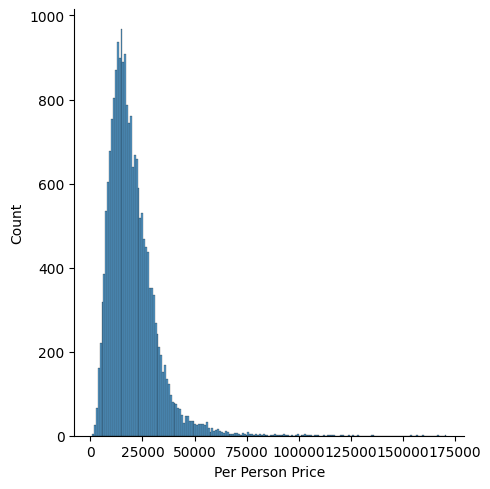

In [3]:
# Target Variable - Per Person Price

sns.displot(train["Per Person Price"])
plt.show()

# Price cannot be negative
# Why Positively Skewed - Some people will be high spenders, some will be normal
# Premium Packages also exist and there are people willing to opt for it
# Hence, we see that the Data is Positively Skewed.

In [6]:
# Check info of the data

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Uniq Id                     21000 non-null  object        
 1   Package Name                21000 non-null  object        
 2   Package Type                21000 non-null  object        
 3   Destination                 21000 non-null  object        
 4   Itinerary                   21000 non-null  object        
 5   Places Covered              21000 non-null  object        
 6   Travel Date                 21000 non-null  datetime64[ns]
 7   Hotel Details               21000 non-null  object        
 8   Start City                  21000 non-null  object        
 9   Airline                     21000 non-null  object        
 10  Flight Stops                21000 non-null  int64         
 11  Meals                       21000 non-null  int64     

In [5]:
# Travel Date
train["Travel Date"] = pd.to_datetime(train["Travel Date"])

In [8]:
# Extracting Date, Month and Year...
train["Date"]=train["Travel Date"].dt.day
train["Month"]=train["Travel Date"].dt.month
train["Year"]=train["Travel Date"].dt.year

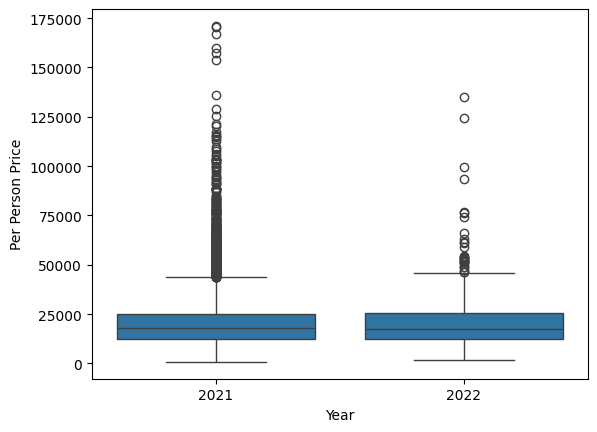

In [11]:
sns.boxplot(x = "Year", y = "Per Person Price", data = train)
plt.show()

In [15]:
# Statistical Test: Date, Month and Year have any relation with TGT or not??

# Ho: Target is Independent of the Predictors.
# Ha: Target is Dependent on the Predictor

train["target"]=train["Per Person Price"]

import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

model = sfa.ols("target~Date+Month+Year", data = train).fit()

print(anova_lm(model))

               df        sum_sq       mean_sq         F    PR(>F)
Date          1.0  7.926039e+06  7.926039e+06  0.058457  0.808953
Month         1.0  5.591506e+07  5.591506e+07  0.412393  0.520764
Year          1.0  8.058435e+07  8.058435e+07  0.594337  0.440755
Residual  20996.0  2.846782e+12  1.355869e+08       NaN       NaN


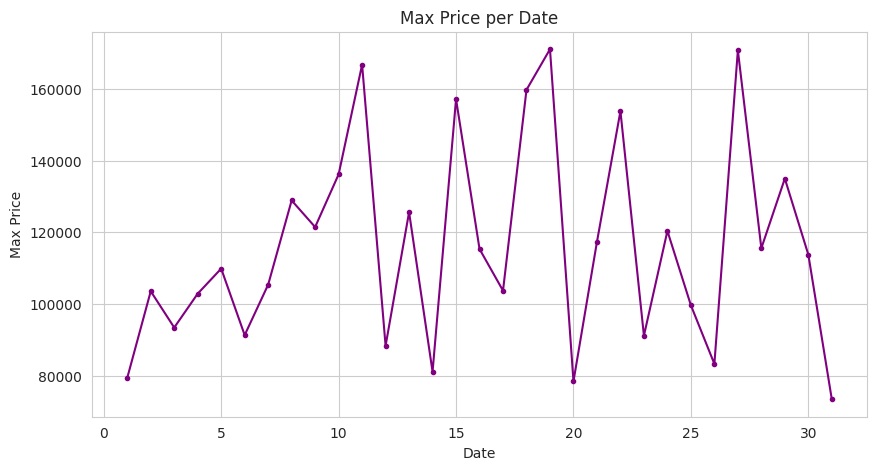

In [26]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
max_dates = train.groupby("Date")["Per Person Price"].max()

plt.plot(max_dates.index, max_dates.values, color = "purple", marker = ".")
plt.title("Max Price per Date")
plt.xlabel("Date")
plt.ylabel("Max Price")
plt.show()

# Peak Dates: [2, 3, 4,5, 7, 8, 10, 11, 13, 15, 18, 19, 21, 22, 24, 27, 29]

In [27]:
peak_days = [2, 3, 4,5, 7, 8, 10, 11, 13, 15, 18, 19, 21, 22, 24, 27, 29]

def busy(x):
  if x in peak_days:
    return("Peak")
  else:
    return("Normal")

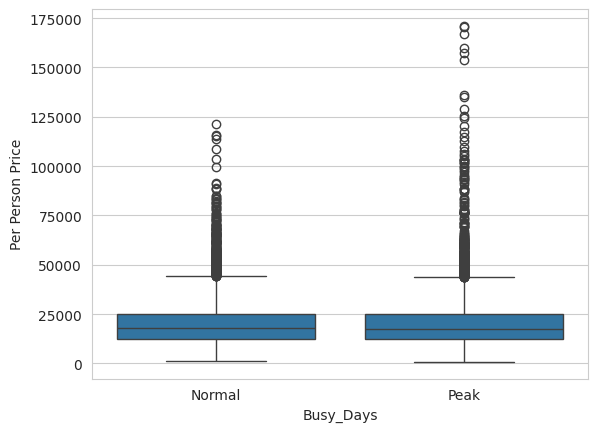

In [28]:
train["Busy_Days"] = train.Date.apply(busy)

sns.boxplot(x = "Busy_Days", y ="Per Person Price", data = train)
plt.show()

In [29]:
# Lets validate the pattern using T Test

import scipy.stats as stats

normal = train.loc[train.Busy_Days=="Normal", "Per Person Price"]
peak = train.loc[train.Busy_Days=="Peak", "Per Person Price"]

# Ho: Predictor has no relation with the target
# Ha: Ho is False

stats.ttest_ind(normal, peak)
# No Relation...

TtestResult(statistic=0.5072134385480368, pvalue=0.6120103934353949, df=20998.0)

In [3]:
# Destination
#train.Destination.str.split("|")

# Count of Destinations
train["Destination_Count"] = train.Destination.apply(lambda x:len(x.split("|")))

In [4]:
# Sightseeing Places Covered
train["Sight_Count"] = train['Sightseeing Places Covered'].apply(lambda x:len(x.split("|")))

# Airline
train["Airline_Count"] = train['Airline'].apply(lambda x:len(x.split("|")))

In [46]:
train.loc[:, ['Destination_Count', 'Sight_Count', 'Airline_Count', "Per Person Price"]].corr()

,Destination_Count,Sight_Count,Airline_Count,Per Person Price
Destination_Count,1.000000,0.432198,0.077882,0.317759
Sight_Count,0.432198,1.000000,-0.169605,0.140275
Airline_Count,0.077882,-0.169605,1.000000,0.432892
Per Person Price,0.317759,0.140275,0.432892,1.000000


In [62]:
train.Itinerary[3]
# Regex and extract the desired information

'2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kovalam and Poovar'

In [5]:
# Pattern: \d
import re
text = re.findall("\d", train.Itinerary[3])
count = pd.to_numeric(text).sum()
count

6

In [6]:
# Itinerary
def duration(text):
  text = re.findall("\d", text)
  count = pd.to_numeric(text).sum()
  return count

train["Holidays"]=train.Itinerary.apply(duration)

In [7]:
train.loc[:, ["Holidays", 'Destination_Count',
              'Sight_Count', 'Airline_Count', "Per Person Price"]].corr()

,Holidays,Destination_Count,Sight_Count,Airline_Count,Per Person Price
Holidays,1.000000,0.757535,0.367422,0.155989,0.510186
Destination_Count,0.757535,1.000000,0.432198,0.077882,0.317759
Sight_Count,0.367422,0.432198,1.000000,-0.169605,0.140275
Airline_Count,0.155989,0.077882,-0.169605,1.000000,0.432892
Per Person Price,0.510186,0.317759,0.140275,0.432892,1.000000


In [8]:
pd.set_option('display.max_columns', 50)
train.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Destination_Count,Sight_Count,Airline_Count,Holidays
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,4,1,1,6
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,3,7,2,4
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5,2,8,1,3
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0,4,9,1,6
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0,2,2,2,7


In [68]:
train["Hotel Details"].unique()

array(['Not Available',
       'The Orchard Retreat & Spa:4.6|WelcomHotel Pine N Peak Pahalgam - Member ITC Hotel Group:4.1|The Orchard Retreat & Spa:4.6',
       'The Ananta:4.4|juSTa Lake Nahargarh Palace:4', ...,
       'Hotel The Royal Plaza:4.0|The Taj Vilas:4.0|Lemon Tree Premier Jaipur:4.5',
       'Club Mahindra Virajpet, Coorg:4|The Quorum:3.5|Hotel Meadows Residency:4.4',
       'Poppys Hotel:Four|Hyatt Place Rameswaram:Four|Vinayaga by Poppys:Three|Svatma:Four|Red Fox Hotel ,Trichy:Three|Kodai Resort Hotel:Four'],
      dtype=object)

In [69]:
example = ''''Hotel The Royal Plaza:4.0|The Taj Vilas:4.0|Lemon Tree Premier Jaipur:4.5,
       Club Mahindra Virajpet, Coorg:4|The Quorum:3.5|Hotel Meadows Residency:4.4,
       Poppys Hotel:Four|Hyatt Place Rameswaram:Four|Vinayaga by Poppys:Three|Svatma:Four|Red Fox Hotel ,Trichy:Three|Kodai Resort Hotel:Four'''

print(example)


'Hotel The Royal Plaza:4.0|The Taj Vilas:4.0|Lemon Tree Premier Jaipur:4.5,
       Club Mahindra Virajpet, Coorg:4|The Quorum:3.5|Hotel Meadows Residency:4.4,
       Poppys Hotel:Four|Hyatt Place Rameswaram:Four|Vinayaga by Poppys:Three|Svatma:Four|Red Fox Hotel ,Trichy:Three|Kodai Resort Hotel:Four


In [9]:
def convert(text):
  text = text.replace(":One", ":1")
  text = text.replace(":Two", ":2")
  text = text.replace(":Three", ":3")
  text = text.replace(":Four", ":4")
  text = text.replace(":Five", ":5")
  return text

In [10]:
train["Hotel"] = train["Hotel Details"].apply(convert)

In [17]:
new = ['4.6', '4.4', '4', "100"]
newtext = pd.to_numeric(new)
df = pd.DataFrame(newtext, columns = ["Rating"])

df.loc[df.Rating<=5, "Rating"].mean()

4.333333333333333

In [18]:
#Pattern - \d.\d|\d

def rating(text):
  if text =="Not Available":
    return(0)
  else:
    text = re.findall("[\d]+(?:\.[\d]+)?", text)
    newtext = pd.to_numeric(text)
    df = pd.DataFrame(newtext, columns = ["Rating"])
    new = df.loc[df.Rating<=5, "Rating"].mean()
    return new

In [19]:
train["Ratings"] = train.Hotel.apply(rating)

In [23]:
train.head() #

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Destination_Count,Sight_Count,Airline_Count,Holidays,Hotel,Ratings
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,4,1,1,6,Not Available,0.000000
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,3,7,2,4,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,4.433333
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5,2,8,1,3,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,4.200000
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0,4,9,1,6,Elixir Hills Suites Resort & Spa-MMT Holidays ...,4.500000
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0,2,2,2,7,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,4.350000


In [27]:
# Drop the columns

newtrain = train.drop(['Itinerary', 'Places Covered',
            'Destination', 'Travel Date', 'Hotel Details', 'Hotel', 'Airline', 'Sightseeing Places Covered'],
            axis = 1)

In [34]:
# Start City
def city(text):
  if text == "New Delhi":
    return(1)
  else:
    return(0)

In [36]:
newtrain["Start City"] = newtrain["Start City"].apply(city)

In [39]:
newtrain["Package Type"].unique()

array(['Standard', 'Premium', 'Luxury', 'Deluxe', 'Budget'], dtype=object)

In [40]:
newtrain.groupby("Package Type")["Per Person Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Package Type,,,,,,,,
Budget,466.0,14151.447425,8236.467588,1757.0,8901.250,13114.25,17927.00,64008.5
Deluxe,6006.0,18409.508825,10228.326587,1198.0,12119.000,16426.75,22774.25,171062.5
Luxury,3278.0,23679.556437,11958.923869,2963.0,15471.625,22222.50,29170.75,107850.0
Premium,5581.0,23965.407006,13272.618593,2967.0,15232.000,21767.50,29188.00,170763.0
Standard,5669.0,16354.089081,9363.498521,791.0,10563.500,14729.50,19972.00,153795.0


In [41]:
mapped = {'Premium':5, 'Luxury':4, 'Deluxe': 3, "Standard":2, "Budget":1}

newtrain["Package Type"] = newtrain["Package Type"].map(mapped)

In [43]:
newtrain.drop("Package Name", axis = 1, inplace = True)

In [45]:
newtrain.drop("Uniq Id",axis = 1, inplace = True)

In [47]:
newtrain.head()

,Package Type,Start City,Flight Stops,Meals,Cancellation Rules,Per Person Price,Destination_Count,Sight_Count,Airline_Count,Holidays,Ratings
0,2,0,2,3,Not Available,11509.0,4,1,1,6,0.000000
1,5,1,0,5,Cancellation any time after making the 1st pay...,22485.5,3,7,2,4,4.433333
2,4,1,0,4,Cancellation any time after making the 1st pay...,12421.5,2,8,1,3,4.200000
3,5,1,0,5,Cancellation any time after making the 1st pay...,35967.0,4,9,1,6,4.500000
4,5,1,0,5,Cancellation any time after making the 1st pay...,25584.0,2,2,2,7,4.350000


In [49]:
# Magical Features

newtrain["Magic1"]= newtrain.groupby("Package Type")\
 ["Per Person Price"].transform("count")

newtrain["Magic2"]= newtrain.groupby("Package Type")\
 ["Per Person Price"].transform("min")

newtrain["Magic3"]= newtrain.groupby("Package Type")\
 ["Per Person Price"].transform("max")

newtrain["Magic4"]= newtrain.groupby("Package Type")\
 ["Per Person Price"].transform("mean")

newtrain["Magic5"]= newtrain.groupby("Package Type")\
 ["Per Person Price"].transform("median")

newtrain["Magic6"]= newtrain.groupby("Package Type")\
 ["Per Person Price"].transform("std")

In [50]:
newtrain.loc[:, ["Magic1", "Magic2", "Magic3",
                 "Magic4", "Magic5", "Magic6",
                 "Per Person Price"]].corr() # 1, 3

,Magic1,Magic2,Magic3,Magic4,Magic5,Magic6,Per Person Price
Magic1,1.000000,-0.436628,0.959123,-0.234359,-0.305763,-0.082368,-0.067840
Magic2,-0.436628,1.000000,-0.237025,0.964510,0.972931,0.932427,0.279198
Magic3,0.959123,-0.237025,1.000000,-0.054167,-0.134948,0.121686,-0.015680
Magic4,-0.234359,0.964510,-0.054167,1.000000,0.996471,0.972793,0.289471
Magic5,-0.305763,0.972931,-0.134948,0.996471,1.000000,0.953616,0.288450
Magic6,-0.082368,0.932427,0.121686,0.972793,0.953616,1.000000,0.281596
Per Person Price,-0.067840,0.279198,-0.015680,0.289471,0.288450,0.281596,1.000000


In [51]:
newtrain["Magic7"]= newtrain.groupby("Holidays")\
 ["Per Person Price"].transform("count")

newtrain["Magic8"]= newtrain.groupby("Holidays")\
 ["Per Person Price"].transform("min")

newtrain["Magic9"]= newtrain.groupby("Holidays")\
 ["Per Person Price"].transform("max")

newtrain["Magic10"]= newtrain.groupby("Holidays")\
 ["Per Person Price"].transform("mean")

newtrain["Magic11"]= newtrain.groupby("Holidays")\
 ["Per Person Price"].transform("median")

newtrain["Magic12"]= newtrain.groupby("Holidays")\
 ["Per Person Price"].transform("std")

In [52]:
newtrain.loc[:, ["Magic7", "Magic8", "Magic9",
                 "Magic10", "Magic11", "Magic12",
                 "Per Person Price"]].corr() # 1, 3

,Magic7,Magic8,Magic9,Magic10,Magic11,Magic12,Per Person Price
Magic7,1.000000,-0.588496,0.211257,-0.327650,-0.344817,-0.355635,-0.172002
Magic8,-0.588496,1.000000,0.086154,0.917882,0.920681,0.896279,0.481848
Magic9,0.211257,0.086154,1.000000,0.052803,0.029517,0.222559,0.027719
Magic10,-0.327650,0.917882,0.052803,1.000000,0.990480,0.948196,0.524956
Magic11,-0.344817,0.920681,0.029517,0.990480,1.000000,0.909502,0.519959
Magic12,-0.355635,0.896279,0.222559,0.948196,0.909502,1.000000,0.497761
Per Person Price,-0.172002,0.481848,0.027719,0.524956,0.519959,0.497761,1.000000


In [53]:
newtrain["Magic13"]= newtrain.groupby("Destination_Count")\
 ["Per Person Price"].transform("count")

newtrain["Magic14"]= newtrain.groupby("Destination_Count")\
 ["Per Person Price"].transform("min")

newtrain["Magic15"]= newtrain.groupby("Destination_Count")\
 ["Per Person Price"].transform("max")

newtrain["Magic16"]= newtrain.groupby("Destination_Count")\
 ["Per Person Price"].transform("mean")

newtrain["Magic17"]= newtrain.groupby("Destination_Count")\
 ["Per Person Price"].transform("median")

newtrain["Magic18"]= newtrain.groupby("Destination_Count")\
 ["Per Person Price"].transform("std")

In [58]:
newtrain.loc[newtrain.Ratings.isnull(), "Ratings"] = 4.0

In [59]:
# Convert the Data into Train and Test

newtrain = pd.get_dummies(newtrain, drop_first = True)

X = newtrain.drop("Per Person Price", axis = 1)
y = newtrain["Per Person Price"]

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20,
                                                random_state = 42)

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor()

pred = rf.fit(xtrain, ytrain).predict(xtest)

rmse = np.sqrt(mean_squared_error(ytest, pred))

print("RMSE: ", rmse) # 6500

RMSE:  6542.6507320691335


In [63]:
from sklearn.ensemble import GradientBoostingRegressor
rf = GradientBoostingRegressor()

pred = rf.fit(xtrain, ytrain).predict(xtest)

rmse = np.sqrt(mean_squared_error(ytest, pred))

print("RMSE: ", rmse)

RMSE:  7446.022761119301
